In [100]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [62]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Housing and Urban Development Data
https://www.huduser.gov/portal/datasets/hads/HADS_doc.pdf  
https://www.huduser.gov/portal/datasets/hads/hads.html

In [6]:
with open('thads2013n.txt', 'r') as f:
    data = f.read()

In [8]:
df = pd.read_csv('thads2013n.txt')

In [9]:
df

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,...,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,...,'1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,...,'3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,...,'2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,...,'2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,...,'3 GT FMR','3 50 - 60% AMI','3 50 - 60% AMI','3 50 - 60% AMI','3 50 - 60% AMI','7 120% AMI +','0 Not Assisted','1 Less than 30%','-5','-5'
5,'100007390148',56,'2','3',62066,657,13170,21924,35073,12005,...,'2 50.1 - 100% FMR','3 50 - 60% AMI','3 50 - 60% AMI','3 50 - 60% AMI','3 50 - 60% AMI','2 30 - 50% AMI','1 Assisted','3 50% or More','-5','-5'
6,'100007540148',50,'1','3',60991,988,16646,27713,44340,18050,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','6 100 - 120% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
7,'100008700141',26,'4','4',52322,773,13489,22471,35929,15992,...,'3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','4 60 - 80% AMI','4 60 - 80% AMI','4 60 - 80% AMI','0 Not Assisted','2 30% to 50%','West','-5'
8,'100008960141',60,'5','4',50296,1125,13115,21859,34939,15452,...,'3 GT FMR','6 100 - 120% AMI','6 100 - 120% AMI','7 120% AMI +','5 80 - 100% AMI','7 120% AMI +','.','1 Less than 30%','West','-5'
9,'100009170148',26,'4','2',63221,552,13338,22199,35501,12005,...,'3 GT FMR','5 80 - 100% AMI','5 80 - 100% AMI','5 80 - 100% AMI','5 80 - 100% AMI','6 100 - 120% AMI','0 Not Assisted','1 Less than 30%','-5','-5'


In [15]:
home_owner_ages = df['AGE1']
zone_status = df['METRO3']
area_median_incomes = df['LMED']
home_values = df['VALUE']
fair_market_rent = df['FMR']
occupants = df['PER']

In [130]:
zone_status = [int(x.strip('\'')) for x in zone_status]

In [13]:
# Compare home owner ages to value

In [14]:
Home_owner_ages

64535

In [82]:
home_owner_ages_Test = np.array(Home_owner_Ages[:50000])
home_owner_ages_Train = np.array(home_owner_ages[50001:])

In [83]:
home_values_Test = np.array(home_values[:50000])
home_values_Train = np.array(home_values[50001:])

In [108]:
def reshapeData(ar):
    return ar.reshape(len(ar), 1)
def testAndTrain(ar):
    thresh = len(ar)*.8
    return reshape(np.array(ar[:thresh])), reshape(np.array(ar[thresh:]))

In [85]:
home_owner_ages_Test = reshapeData(Home_owner_ages_Test)
home_owner_ages_Train = reshapeData(home_owner_ages_Train)
home_values_Test = reshapeData(home_values_Test)
home_values_Train = reshapeData(home_values_Train)

c:\intelpython3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [89]:
home_owner_ages_Test

array([[82],
       [50],
       [53],
       ..., 
       [45],
       [60],
       [-9]], dtype=int64)

In [86]:
regr = linear_model.LinearRegression()

In [90]:
regr.fit(home_owner_ages_Test, home_values_Test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
age_to_value_prediction = regr.predict(home_owner_ages_Test)

In [99]:
print('Coefficient: {}'.format(regr.coef_))
print('Mean Squared Error: {}'.format(mean_squared_error(home_values_Test, age_to_value_prediction)))
print('Variance: {}'.format(r2_score(home_values_Test, age_to_value_prediction)))

Coefficient: [[ 1741.81270872]]
Mean Squared Error: 62414854984.60839
Variance: 0.024789865908758535


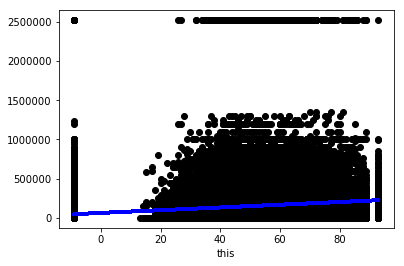

In [109]:
plt.scatter(home_owner_ages_Test, home_values_Test, color='black')
plt.plot(home_owner_ages_Test, age_to_value_prediction, linewidth=3, color='blue')
plt.xlabel('this')
plt.show()

In [104]:
Home_owner_ages_Test.min()

-9

In [105]:
Home_owner_ages_Test.max()

93

In [107]:
df['AGE1'].min()

-9

In [133]:
def reshapeData(ar):
    return ar.reshape(len(ar), 1)
def testAndTrain(ar):
    thresh = int(len(ar)*.8)
    return reshapeData(np.array(ar[:thresh])), np.array(ar[thresh:])
def predictionY(ar1_Test, ar2_Test):
    regr = linear_model.LinearRegression()
    regr.fit(ar1_Test, ar2_Test)
    return regr, regr.predict(ar1_Test)
def printStats(regr, prediction, ar1_test, ar2_Test):
    print('Coefficient: {}'.format(regr.coef_))
    print('Mean Squared Error: {}'.format(mean_squared_error(ar2_Test, prediction)))
    print('Variance: {}'.format(r2_score(ar2_Test, prediction)))
def plotPrediction(ar1_Test, ar2_Test, prediction, xlabel, ylabel, title):
    plt.scatter(ar1_Test, ar2_Test, color='black')
    plt.plot(ar1_Test, prediction, linewidth=3, color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
def compareTwoLinearPrediction(ar1, ar2, title, xlabel=None, ylabel=None):
    ar1_Test, ar1_Train = testAndTrain(ar1)
    ar2_Test, ar2_Train = testAndTrain(ar2)
    regr, prediction = predictionY(ar1_Test, ar2_Test)
    printStats(regr, prediction, ar1_Test, ar2_Test)
    plotPrediction(ar1_Test, ar2_Test, prediction, xlabel, ylabel, title)

Coefficient: [[ 0.00069309]]
Mean Squared Error: 127723.54668882448
Variance: 0.1921282603617538


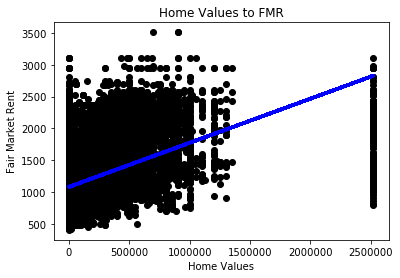

In [138]:
compareTwoLinearPrediction( home_values, fair_market_rent, 'Home Values to FMR', 'Home Values', 'Fair Market Rent')

In [129]:
int(zone_status[0].strip('\''))

3

Coefficient: [[ 7.186198]]
Mean Squared Error: 159088733.80508783
Variance: 0.00016987202288520908


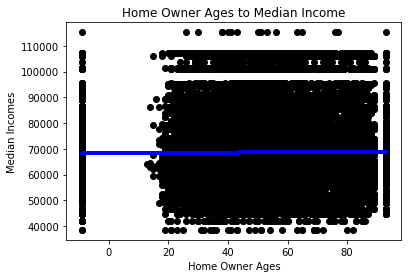

In [141]:
compareTwoLinearPrediction( home_owner_Ages, area_median_incomes, 'Home Owner Ages to Median Income', 'Home Owner Ages', 'Median Incomes')

Coefficient: [[ 0.01048863]]
Mean Squared Error: 152159561.11597863
Variance: 0.043717868482619604


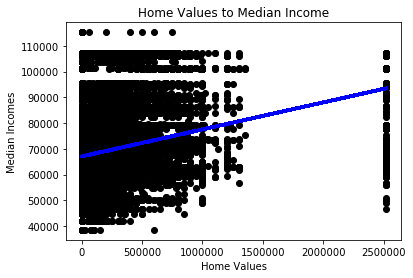

In [142]:
compareTwoLinearPrediction( home_values, area_median_incomes, 'Home Values to Median Income', 'Home Values', 'Median Incomes')